In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from scipy import stats
import os
import kaleido
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
sns.set_palette("Blues_r")

In [ ]:
if not os.path.exists('visualisasi'):
    os.makedirs('visualisasi')

In [3]:
def save_plotly(fig, filename):
    fig.write_image(f"visualisasi/{filename}.png")
    return fig

In [4]:
def styling_ax(ax, title, xlabel=None, ylabel=None):
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=12)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return ax

# Load Dataset

In [5]:
df = pd.read_csv('./data/employee_data.csv')

In [6]:
print(f"Jumlah baris data: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

df.head()

Jumlah baris data: 1470
Jumlah kolom: 35


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [10]:
print("\nTipe data setiap kolom:")
df.dtypes


Tipe data setiap kolom:


EmployeeId                    int64
Age                           int64
Attrition                   float64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [11]:
print("\nStatistik Deskriptif:")
print(df.describe().T)


Statistik Deskriptif:
                           count          mean          std     min      25%  \
EmployeeId                1470.0    735.500000   424.496761     1.0   368.25   
Age                       1470.0     36.923810     9.135373    18.0    30.00   
Attrition                 1058.0      0.169187     0.375094     0.0     0.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction  

In [36]:
def plot_numeric_summary(df):
    important_vars = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 
                      'JobLevel', 'JobSatisfaction', 'WorkLifeBalance']
    
    fig = make_subplots(
        rows=3, 
        cols=3, 
        subplot_titles=important_vars,
        vertical_spacing=0.1,
        horizontal_spacing=0.1
    )
    
    colors = {'Mean': 'royalblue', 'Median': 'darkorange', 'Min': 'green', 
              'Max': 'red', 'StdDev': 'purple'}
    
    for i, var in enumerate(important_vars):
        row = i // 3 + 1
        col = i % 3 + 1
        
        stats = {
            'Mean': df[var].mean(),
            'Median': df[var].median(),
            'Min': df[var].min(),
            'Max': df[var].max(),
            'StdDev': df[var].std()
        }
        
        for j, (stat, value) in enumerate(stats.items()):
            fig.add_trace(
                go.Bar(
                    x=[stat],
                    y=[value],
                    name=stat,
                    marker_color=colors[stat],
                    showlegend=True if (i == 0) else False
                ),
                row=row, col=col
            )
    
    fig.update_layout(
        title_text="Statistik Deskriptif - Variabel Numerik",
        title_font_size=18,
        height=800,
        width=1000,
        legend_title="Statistik",
        plot_bgcolor='white'
    )
    
    for i, var in enumerate(important_vars):
        row = i // 3 + 1
        col = i % 3 + 1
    
    save_plotly(fig, "numeric_summary_subplots")
    return fig

In [37]:
numeric_summary_fig = plot_numeric_summary(df)
numeric_summary_fig.show()

In [34]:
def plot_categorical_summary(df):
    categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 
                        'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
    
    fig = make_subplots(rows=3, cols=3, subplot_titles=categorical_cols)
    
    color_palette = [
        'royalblue',       
        'tomato',          
        'mediumseagreen',  
        'darkorchid',      
        'darkorange',      
        'darkturquoise',   
        'crimson'          
    ]
    
    for i, col in enumerate(categorical_cols):
        row = i // 3 + 1
        col_pos = i % 3 + 1
        
        value_counts = df[col].value_counts().reset_index()
        value_counts.columns = [col, 'Count']
        
        fig.add_trace(
            go.Bar(
                x=value_counts[col], 
                y=value_counts['Count'],
                marker_color=color_palette[i],
                showlegend=False
            ),
            row=row, col=col_pos
        )
    
    fig.update_layout(
        title_text="Distribusi Variabel Kategorikal",
        title_font_size=18,
        height=900,
        width=900,
        plot_bgcolor='white'
    )
    
    save_plotly(fig, "categorical_summary")
    return fig

In [ ]:
categorical_summary_fig = plot_categorical_summary(df)
categorical_summary_fig.show()

# Data Cleaning

In [43]:
print("Jumlah nilai yang hilang dalam dataset:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Jumlah nilai yang hilang dalam dataset:
Attrition    412
dtype: int64


In [ ]:
attrition_distribution = df['Attrition'].value_counts(dropna=False)
print("Distribusi nilai Attrition:")
print(attrition_distribution)

Distribusi nilai Attrition:
Attrition
0.0    879
NaN    412
1.0    179
Name: count, dtype: int64


## Handle Missing Value dgn KNN Imputer

In [45]:
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 
                       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

In [46]:
df_for_imputation = df.copy()

In [47]:
#label encoding untuk kategorikal kolom biar bisa digunakan KNN imputer
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    if df_for_imputation[col].isnull().sum() > 0:
        df_for_imputation[col].fillna(df_for_imputation[col].mode()[0], inplace=True)
    
    df_for_imputation[col] = le.fit_transform(df_for_imputation[col])
    label_encoders[col] = le
    print(f"Encoding untuk {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Encoding untuk BusinessTravel: {'Non-Travel': np.int64(0), 'Travel_Frequently': np.int64(1), 'Travel_Rarely': np.int64(2)}
Encoding untuk Department: {'Human Resources': np.int64(0), 'Research & Development': np.int64(1), 'Sales': np.int64(2)}
Encoding untuk EducationField: {'Human Resources': np.int64(0), 'Life Sciences': np.int64(1), 'Marketing': np.int64(2), 'Medical': np.int64(3), 'Other': np.int64(4), 'Technical Degree': np.int64(5)}
Encoding untuk Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Encoding untuk JobRole: {'Healthcare Representative': np.int64(0), 'Human Resources': np.int64(1), 'Laboratory Technician': np.int64(2), 'Manager': np.int64(3), 'Manufacturing Director': np.int64(4), 'Research Director': np.int64(5), 'Research Scientist': np.int64(6), 'Sales Executive': np.int64(7), 'Sales Representative': np.int64(8)}
Encoding untuk MaritalStatus: {'Divorced': np.int64(0), 'Married': np.int64(1), 'Single': np.int64(2)}
Encoding untuk Over18: {'Y': np.int64(0)}
Encodi

In [ ]:
# Memilih kolom untuk imputasi Attrition
imputation_columns = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
                     'Education', 'EnvironmentSatisfaction', 'HourlyRate',
                     'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                     'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'TotalWorkingYears',
                     'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [49]:
imputation_data = df_for_imputation[imputation_columns + ['Attrition']]

In [50]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(imputation_data)

In [51]:
df['Attrition'] = imputed_data[:, -1]

In [ ]:
# Mengkonversi hasil KNN Imputer menjadi binary (0 atau 1)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x >= 0.5 else 0)

print(f"\nSetelah imputasi, distribusi Attrition: {df['Attrition'].value_counts().to_dict()}")


Setelah imputasi, distribusi Attrition: {0: 1262, 1: 208}


### Visualisasi hasil imputasi

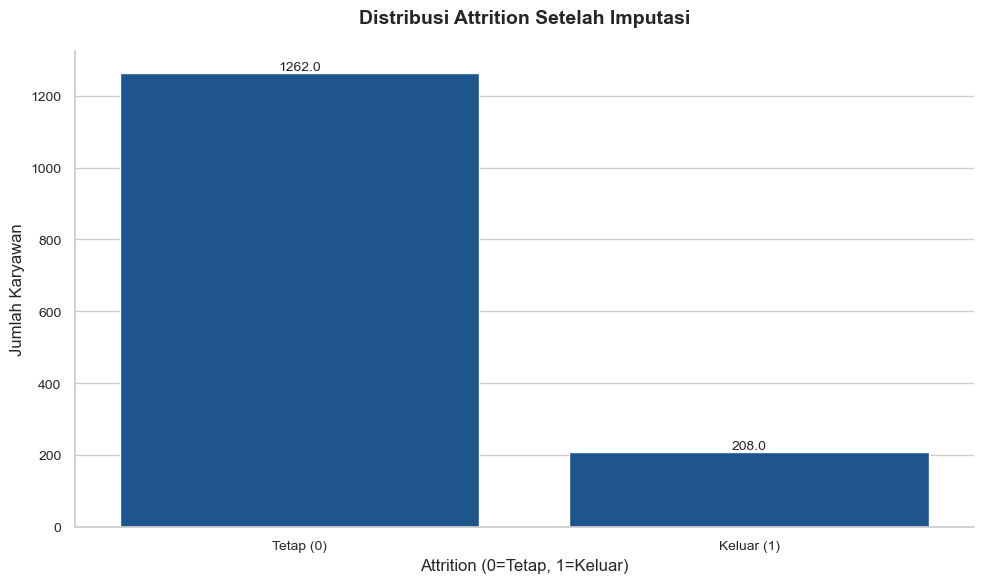

In [53]:
def plot_imputation_results():
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='Attrition', data=df)
    styling_ax(ax, 'Distribusi Attrition Setelah Imputasi', 'Attrition (0=Tetap, 1=Keluar)', 'Jumlah Karyawan')
    
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{p.get_height()}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=10)
    
    plt.xticks([0, 1], ['Tetap (0)', 'Keluar (1)'])
    plt.tight_layout()
    plt.savefig('visualisasi/attrition_after_imputation.png', bbox_inches='tight', dpi=300)
    plt.show()
    
    fig = px.pie(
        values=df['Attrition'].value_counts().values,
        names=['Tetap', 'Keluar'],
        title='Distribusi Attrition Setelah Imputasi',
        color_discrete_sequence=px.colors.sequential.Blues_r,
        hole=0.4
    )
    
    fig.update_layout(
        title_font_size=18,
        legend_title_font_size=12,
        width=700,
        height=500
    )
    
    fig.update_traces(
        textinfo='percent+value', 
        textposition='inside', 
        textfont_size=14
    )
    
    save_plotly(fig, "attrition_pie_chart")
    fig.show()

plot_imputation_results()

### Cek Missing Value

In [55]:
df.isnull().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Outlier

## Detect Outlier

In [56]:
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                     'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                     'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                     'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [58]:
def detect_and_visualize_outliers(df, column):
    # Menghitung statistik untuk deteksi outlier
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Visualisasi dengan plotly
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=["Boxplot", "Distribusi dengan Outlier"])
    
    fig.add_trace(
        go.Box(
            y=df[column],
            name=column,
            boxmean=True,
            marker_color='royalblue'
        ),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Histogram(
            x=df[column],
            name=column,
            marker_color='royalblue',
            opacity=0.7
        ),
        row=1, col=2
    )
    
    fig.add_vline(x=lower_bound, line_dash="dash", line_color="red", row=1, col=2)
    fig.add_vline(x=upper_bound, line_dash="dash", line_color="red", row=1, col=2)
    
    # Update layout
    fig.update_layout(
        title_text=f"Analisis Outlier: {column}",
        title_font_size=16,
        height=400,
        width=900,
        showlegend=False,
        plot_bgcolor='white'
    )
    
    save_plotly(fig, f"outlier_{column}")
    fig.show()
    
    return {
        'column': column,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': len(outliers),
        'outlier_percentage': len(outliers) / len(df) * 100
    }

In [59]:
important_columns = ['MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 
                     'YearsSinceLastPromotion', 'NumCompaniesWorked']

In [60]:
outlier_results = {}
for col in important_columns:
    print(f"\n{'='*50}")
    print(f"Analisis outlier untuk kolom: {col}")
    print(f"{'='*50}")
    result = detect_and_visualize_outliers(df, col)
    outlier_results[col] = result
    print(f"Kolom {col}: {result['outlier_count']} outliers ({result['outlier_percentage']:.2f}%)")
    print(f"Batas bawah (lower bound): {result['lower_bound']}")
    print(f"Batas atas (upper bound): {result['upper_bound']}")



Analisis outlier untuk kolom: MonthlyIncome


Kolom MonthlyIncome: 114 outliers (7.76%)
Batas bawah (lower bound): -5291.0
Batas atas (upper bound): 16581.0

Analisis outlier untuk kolom: YearsAtCompany


Kolom YearsAtCompany: 104 outliers (7.07%)
Batas bawah (lower bound): -6.0
Batas atas (upper bound): 18.0

Analisis outlier untuk kolom: TotalWorkingYears


Kolom TotalWorkingYears: 63 outliers (4.29%)
Batas bawah (lower bound): -7.5
Batas atas (upper bound): 28.5

Analisis outlier untuk kolom: YearsSinceLastPromotion


Kolom YearsSinceLastPromotion: 107 outliers (7.28%)
Batas bawah (lower bound): -4.5
Batas atas (upper bound): 7.5

Analisis outlier untuk kolom: NumCompaniesWorked


Kolom NumCompaniesWorked: 52 outliers (3.54%)
Batas bawah (lower bound): -3.5
Batas atas (upper bound): 8.5


## Analisa Hubungan Outlier dan attrition

In [61]:
def analyze_outlier_attrition(df, column):
    # Identifikasi outlier dengan IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Tandai data outlier
    df_temp = df.copy()
    df_temp['is_outlier'] = ((df_temp[column] < lower_bound) | (df_temp[column] > upper_bound)).astype(int)
    
    # Hitung attrition rate untuk outlier dan non-outlier
    outlier_attrition = df_temp[df_temp['is_outlier'] == 1]['Attrition'].mean()
    normal_attrition = df_temp[df_temp['is_outlier'] == 0]['Attrition'].mean()
    
    print(f"\nHubungan outlier dengan Attrition untuk {column}:")
    print(f"- Attrition rate untuk outlier: {outlier_attrition:.4f} ({outlier_attrition*100:.2f}%)")
    print(f"- Attrition rate untuk non-outlier: {normal_attrition:.4f} ({normal_attrition*100:.2f}%)")
    print(f"- Rasio (outlier/normal): {outlier_attrition/normal_attrition:.2f}x")
    
    # Visualisasi dengan plotly
    fig = px.bar(
        x=['Normal', 'Outlier'],
        y=[normal_attrition, outlier_attrition],
        title=f'Perbandingan Attrition Rate: {column}',
        labels={"x": "Kategori", "y": "Attrition Rate"},
        color=['Normal', 'Outlier'],
        color_discrete_sequence=['royalblue', 'tomato']
    )
    
    # Text annotations
    fig.update_traces(
        text=[f"{normal_attrition:.1%}", f"{outlier_attrition:.1%}"],
        textposition='outside'
    )
    
    # Update layout
    fig.update_layout(
        title_font_size=16,
        height=500,
        width=700,
        plot_bgcolor='white',
        yaxis_tickformat='.0%'
    )
    
    # Menyimpan dan menampilkan
    save_plotly(fig, f"attrition_outlier_{column}")
    fig.show()
    
    return {
        'column': column,
        'outlier_attrition': outlier_attrition,
        'normal_attrition': normal_attrition,
        'ratio': outlier_attrition/normal_attrition if normal_attrition > 0 else 0
    }

In [62]:
attrition_results = []
for col in important_columns:
    result = analyze_outlier_attrition(df, col)
    attrition_results.append(result)

# Ringkasan hasil
print("\nRingkasan Hubungan Outlier dengan Attrition:")
result_df = pd.DataFrame(attrition_results)
result_df = result_df.sort_values('ratio', ascending=False)
print(result_df)



Hubungan outlier dengan Attrition untuk MonthlyIncome:
- Attrition rate untuk outlier: 0.0439 (4.39%)
- Attrition rate untuk non-outlier: 0.1497 (14.97%)
- Rasio (outlier/normal): 0.29x



Hubungan outlier dengan Attrition untuk YearsAtCompany:
- Attrition rate untuk outlier: 0.0865 (8.65%)
- Attrition rate untuk non-outlier: 0.1457 (14.57%)
- Rasio (outlier/normal): 0.59x



Hubungan outlier dengan Attrition untuk TotalWorkingYears:
- Attrition rate untuk outlier: 0.0794 (7.94%)
- Attrition rate untuk non-outlier: 0.1443 (14.43%)
- Rasio (outlier/normal): 0.55x



Hubungan outlier dengan Attrition untuk YearsSinceLastPromotion:
- Attrition rate untuk outlier: 0.1028 (10.28%)
- Attrition rate untuk non-outlier: 0.1445 (14.45%)
- Rasio (outlier/normal): 0.71x



Hubungan outlier dengan Attrition untuk NumCompaniesWorked:
- Attrition rate untuk outlier: 0.1923 (19.23%)
- Attrition rate untuk non-outlier: 0.1396 (13.96%)
- Rasio (outlier/normal): 1.38x



Ringkasan Hubungan Outlier dengan Attrition:
                    column  outlier_attrition  normal_attrition     ratio
4       NumCompaniesWorked           0.192308          0.139633  1.377234
3  YearsSinceLastPromotion           0.102804          0.144534  0.711277
1           YearsAtCompany           0.086538          0.145681  0.594028
2        TotalWorkingYears           0.079365          0.144279  0.550082
0            MonthlyIncome           0.043860          0.149705  0.292974


## Multivariate oulier dengan isolation forest

In [63]:
iso_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
              'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 
              'YearsAtCompany', 'YearsInCurrentRole']

In [ ]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df[iso_columns])

In [65]:
df['outlier'] = outliers
outlier_count = len(df[df['outlier'] == -1])
print(f"Jumlah outlier terdeteksi oleh Isolation Forest: {outlier_count} ({outlier_count / len(df) * 100:.2f}%)")

Jumlah outlier terdeteksi oleh Isolation Forest: 74 (5.03%)


## Handle Outlier

In [68]:
df_transformed = df.copy()

### Mouthly Income

In [69]:
df_transformed['MonthlyIncome_Original'] = df_transformed['MonthlyIncome']
df_transformed['MonthlyIncome_Log'] = np.log1p(df_transformed['MonthlyIncome'])

In [70]:
def visualize_log_transform(df, column, transformed_column):
    # Visualisasi dengan plotly
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=["Distribusi Original", "Distribusi setelah Log Transform"])
    
    # Original distribution
    fig.add_trace(
        go.Histogram(
            x=df[column],
            name="Original",
            marker_color='royalblue',
            opacity=0.7
        ),
        row=1, col=1
    )
    
    # Transformed distribution
    fig.add_trace(
        go.Histogram(
            x=df[transformed_column],
            name="Log Transform",
            marker_color='green',
            opacity=0.7
        ),
        row=1, col=2
    )
    
    # Update layout
    fig.update_layout(
        title_text=f"Transformasi Logaritmik: {column}",
        title_font_size=16,
        height=400,
        width=900,
        showlegend=False,
        plot_bgcolor='white'
    )
    
    # Menyimpan dan menampilkan
    save_plotly(fig, f"log_transform_{column}")
    fig.show()

# Visualisasi transformasi logaritmik
visualize_log_transform(df_transformed, 'MonthlyIncome_Original', 'MonthlyIncome_Log')

### YearsAtCompany

In [71]:
df_transformed['YearsAtCompany_Original'] = df_transformed['YearsAtCompany']

In [72]:
Q1 = df_transformed['YearsAtCompany'].quantile(0.05)  # 5th percentile
Q3 = df_transformed['YearsAtCompany'].quantile(0.95)  # 95th percentile
df_transformed['YearsAtCompany_Winsorized'] = df_transformed['YearsAtCompany'].clip(Q1, Q3)

In [73]:
def visualize_winsorization(df, column, transformed_column):
    # Visualisasi dengan plotly
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=["Boxplot Original", "Boxplot setelah Winsorization"])
    
    # Original boxplot
    fig.add_trace(
        go.Box(
            y=df[column],
            name="Original",
            marker_color='royalblue',
            boxmean=True
        ),
        row=1, col=1
    )
    
    # Transformed boxplot
    fig.add_trace(
        go.Box(
            y=df[transformed_column],
            name="Winsorized",
            marker_color='green',
            boxmean=True
        ),
        row=1, col=2
    )
    
    # Update layout
    fig.update_layout(
        title_text=f"Winsorization (Capping): {column}",
        title_font_size=16,
        height=400,
        width=900,
        showlegend=False,
        plot_bgcolor='white'
    )
    
    # Menyimpan dan menampilkan
    save_plotly(fig, f"winsorization_{column}")
    fig.show()

# Visualisasi winsorization
visualize_winsorization(df_transformed, 'YearsAtCompany_Original', 'YearsAtCompany_Winsorized')


### YearsSinceLastPromotion

In [74]:
df_transformed['YearsSinceLastPromotion_Original'] = df_transformed['YearsSinceLastPromotion']

In [75]:
bins = [0, 2, 5, 10, float('inf')]
labels = ['Recent (0-2)', 'Medium (3-5)', 'Long (6-10)', 'Very Long (>10)']
df_transformed['YearsSinceLastPromotion_Binned'] = pd.cut(
    df_transformed['YearsSinceLastPromotion'], 
    bins=bins,
    labels=labels
)

In [76]:
def visualize_binning(df, column, binned_column):
    # Visualisasi dengan plotly
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=["Histogram Original", "Distribusi setelah Binning"])
    
    # Original distribution
    fig.add_trace(
        go.Histogram(
            x=df[column],
            name="Original",
            marker_color='royalblue',
            opacity=0.7
        ),
        row=1, col=1
    )
    
    # Binned distribution
    binned_counts = df[binned_column].value_counts().sort_index()
    
    fig.add_trace(
        go.Bar(
            x=binned_counts.index,
            y=binned_counts.values,
            name="Binned",
            marker_color='green',
            opacity=0.7
        ),
        row=1, col=2
    )
    
    # Update layout
    fig.update_layout(
        title_text=f"Binning: {column}",
        title_font_size=16,
        height=400,
        width=900,
        showlegend=False,
        plot_bgcolor='white'
    )
    
    # Menyimpan dan menampilkan
    save_plotly(fig, f"binning_{column}")
    fig.show()

# Visualisasi binning
visualize_binning(df_transformed, 'YearsSinceLastPromotion_Original', 'YearsSinceLastPromotion_Binned')

### TotalWorkingYears

In [77]:
df_transformed['TotalWorkingYears_Original'] = df_transformed['TotalWorkingYears']

In [78]:
df_transformed['TotalWorkingYears_Rank'] = df_transformed['TotalWorkingYears'].rank(pct=True)

In [79]:
def visualize_rank_transform(df, column, transformed_column):
    # Visualisasi dengan plotly
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=["Distribusi Original", "Distribusi setelah Rank Transform"])
    
    # Original distribution
    fig.add_trace(
        go.Histogram(
            x=df[column],
            name="Original",
            marker_color='royalblue',
            opacity=0.7
        ),
        row=1, col=1
    )
    
    # Transformed distribution
    fig.add_trace(
        go.Histogram(
            x=df[transformed_column],
            name="Rank Transform",
            marker_color='green',
            opacity=0.7
        ),
        row=1, col=2
    )
    
    # Update layout
    fig.update_layout(
        title_text=f"Rank Transform: {column}",
        title_font_size=16,
        height=400,
        width=900,
        showlegend=False,
        plot_bgcolor='white'
    )
    
    # Menyimpan dan menampilkan
    save_plotly(fig, f"rank_transform_{column}")
    fig.show()

# Visualisasi rank transform
visualize_rank_transform(df_transformed, 'TotalWorkingYears_Original', 'TotalWorkingYears_Rank')

### NumCompaniesWorked

In [83]:
df_transformed['NumCompaniesWorked_Original'] = df_transformed['NumCompaniesWorked']

In [84]:
median = df_transformed['NumCompaniesWorked'].median()
q1 = df_transformed['NumCompaniesWorked'].quantile(0.25)
q3 = df_transformed['NumCompaniesWorked'].quantile(0.75)
iqr = q3 - q1
df_transformed['NumCompaniesWorked_Robust'] = (df_transformed['NumCompaniesWorked'] - median) / iqr

In [85]:
def visualize_robust_scaling(df, column, transformed_column):
    # Visualisasi dengan plotly
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=["Distribusi Original", "Distribusi setelah Robust Scaling"])
    
    # Original distribution
    fig.add_trace(
        go.Box(
            y=df[column],
            name="Original",
            marker_color='royalblue',
            boxmean=True
        ),
        row=1, col=1
    )
    
    # Transformed distribution
    fig.add_trace(
        go.Box(
            y=df[transformed_column],
            name="Robust Scaled",
            marker_color='green',
            boxmean=True
        ),
        row=1, col=2
    )
    
    # Update layout
    fig.update_layout(
        title_text=f"Robust Scaling: {column}",
        title_font_size=16,
        height=400,
        width=900,
        showlegend=False,
        plot_bgcolor='white'
    )
    
    # Menyimpan dan menampilkan
    save_plotly(fig, f"robust_scaling_{column}")
    fig.show()

# Visualisasi robust scaling
visualize_robust_scaling(df_transformed, 'NumCompaniesWorked_Original', 'NumCompaniesWorked_Robust')

# Feature Engineering

In [86]:
df_fe = df_transformed.copy()

## Income per Year Worked Ratio

In [87]:
df_fe['IncomePerYearWorked'] = df_fe['MonthlyIncome'] / df_fe['TotalWorkingYears'].apply(lambda x: x if x > 0 else 1)

## Work life balance score

In [88]:
df_fe['OverTime_Numeric'] = df_fe['OverTime'].map({'Yes': 1, 'No': 0})

In [89]:
df_fe['WorkLifeBalanceScore'] = df_fe['WorkLifeBalance'] - df_fe['OverTime_Numeric']

## Level Role Gap

In [90]:
df_fe['LevelRoleGap'] = df_fe['JobLevel'] - df_fe['YearsInCurrentRole'] / 5  # Normalisasi tahun

## Salary Band (kategori gaji)

In [91]:
salary_bands = [0, df_fe['MonthlyIncome'].quantile(0.25),
                df_fe['MonthlyIncome'].quantile(0.5),
                df_fe['MonthlyIncome'].quantile(0.75), float('inf')]
salary_labels = ['Low', 'Medium', 'High', 'Very High']

df_fe['SalaryBand'] = pd.cut(df_fe['MonthlyIncome'], bins=salary_bands, labels=salary_labels)

## Promotion Rate

In [92]:
df_fe['PromotionRate'] = df_fe['YearsSinceLastPromotion'] / df_fe['YearsAtCompany'].apply(lambda x: x if x > 0 else 1)

## Employee Retention Score

In [93]:
df_fe['RetentionScore'] = df_fe['YearsAtCompany'] / df_fe['TotalWorkingYears'].apply(lambda x: x if x > 0 else 1)

## Job Satisfaction Consistency

In [94]:
df_fe['SatisfactionConsistency'] = df_fe['JobSatisfaction'] - df_fe['RelationshipSatisfaction']
df_fe['SatisfactionConsistency'] = df_fe['SatisfactionConsistency'].abs()  # Mengambil nilai absolut

## Travel Intensity

In [95]:
df_fe['TravelIntensity'] = df_fe['BusinessTravel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
})

## Performance Pay Ratio

In [96]:
df_fe['PerformancePayRatio'] = df_fe['PerformanceRating'] / df_fe['PercentSalaryHike']

## Risk Score

In [97]:
df_fe['RiskScore'] = (
    (df_fe['JobSatisfaction'] < 2).astype(int) + 
    (df_fe['WorkLifeBalance'] < 2).astype(int) + 
    (df_fe['OverTime_Numeric'] == 1).astype(int) +
    (df_fe['EnvironmentSatisfaction'] < 2).astype(int) +
    (df_fe['RelationshipSatisfaction'] < 2).astype(int)
)

## Visualisasi Fitur Baru


Visualisasi hasil feature engineering...


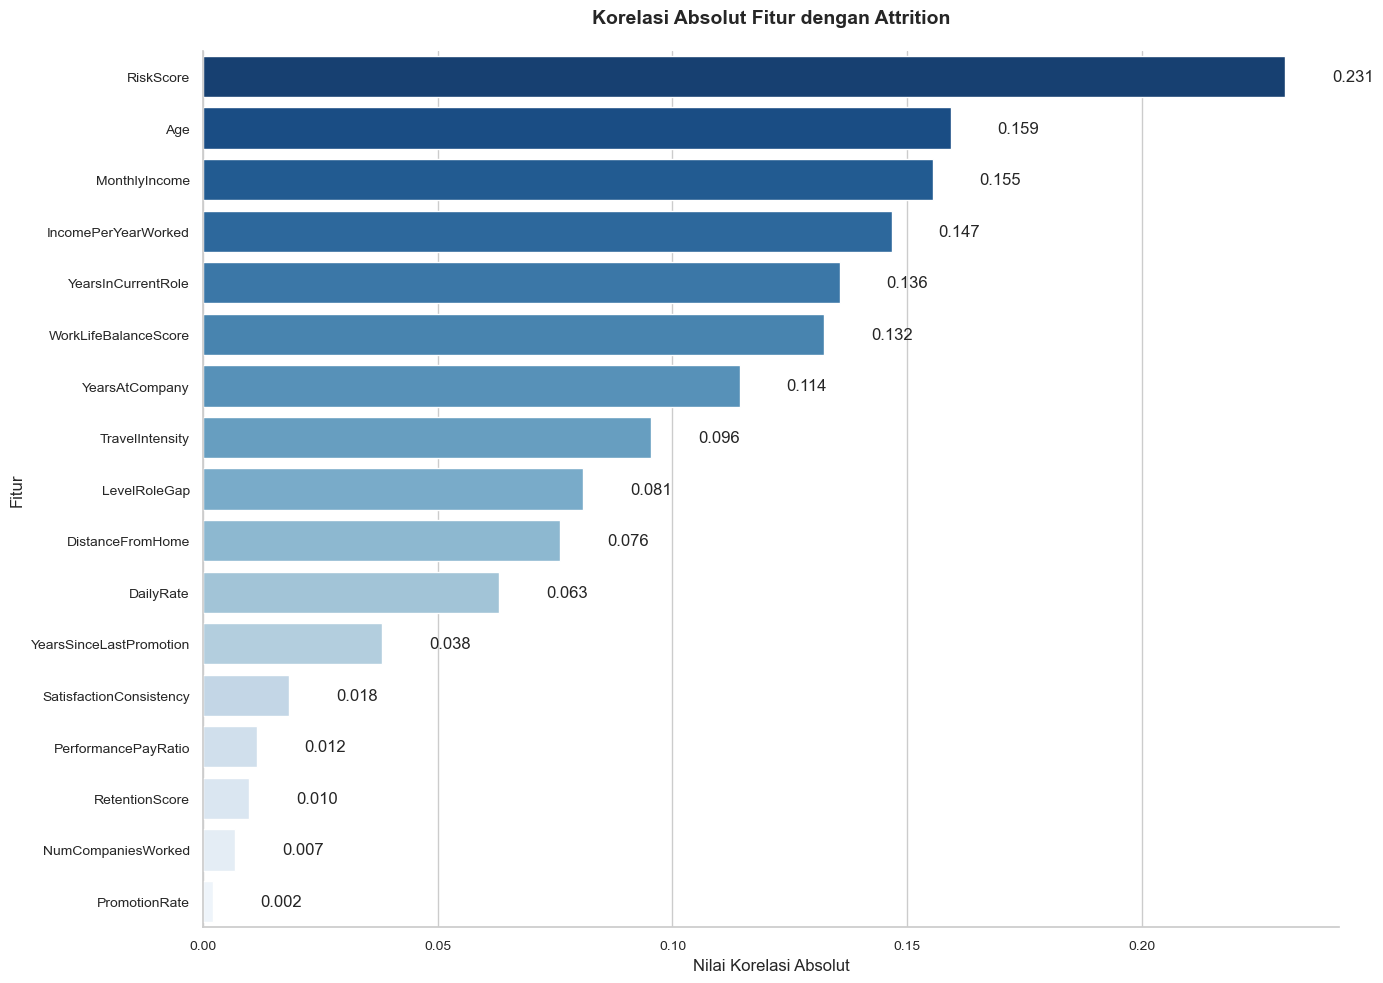


Feature dengan korelasi tertinggi dengan Attrition:
RiskScore               0.230518
Age                     0.159259
MonthlyIncome           0.155460
IncomePerYearWorked     0.146698
YearsInCurrentRole      0.135631
WorkLifeBalanceScore    0.132299
YearsAtCompany          0.114314
TravelIntensity         0.095501
LevelRoleGap            0.080906
DistanceFromHome        0.076096
Name: Attrition, dtype: float64


In [99]:
def plot_feature_importance():
    # Membuat fitur dummy/kategorikal (untuk korelasi)
    df_corr = df_fe.copy()
    
    # One-hot encoding untuk fitur kategorikal
    categorical_features = ['BusinessTravel', 'Department', 'EducationField', 
                            'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'SalaryBand']
    
    # Hitung korelasi dengan target
    numeric_df = df_corr.select_dtypes(include=[np.number])
    
    # Hanya ambil kolom asli dan fitur baru
    important_features = [
        'Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'IncomePerYearWorked', 'WorkLifeBalanceScore', 'LevelRoleGap', 'PromotionRate',
        'RetentionScore', 'SatisfactionConsistency', 'TravelIntensity', 'PerformancePayRatio',
        'RiskScore', 'Attrition'
    ]
    
    feature_correlations = numeric_df[important_features].corr()['Attrition'].sort_values(ascending=False)
    
    # Plot fitur baru dan korelasinya dengan Attrition
    plt.figure(figsize=(14, 10))
    
    # Hanya ambil fitur baru dan fitur asli penting
    feature_to_plot = feature_correlations.drop('Attrition').abs().sort_values(ascending=False)
    
    ax = sns.barplot(x=feature_to_plot.values, y=feature_to_plot.index, palette='Blues_r')
    
    styling_ax(ax, 'Korelasi Absolut Fitur dengan Attrition', 
               'Nilai Korelasi Absolut', 'Fitur')
    
    # Menambahkan nilai pada bar
    for i, v in enumerate(feature_to_plot.values):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center')
    
    plt.tight_layout()
    plt.savefig('visualisasi/feature_correlation.png', bbox_inches='tight', dpi=300)
    plt.show()
    
    # Visualisasi distribusi dari fitur baru dengan plotly
    new_features = [
        'IncomePerYearWorked', 'WorkLifeBalanceScore', 'LevelRoleGap', 
        'PromotionRate', 'RetentionScore', 'RiskScore'
    ]
    
    fig = make_subplots(rows=3, cols=2, subplot_titles=new_features)
    
    for i, feature in enumerate(new_features):
        row = i // 2 + 1
        col = i % 2 + 1
        
        # Histogram berdasarkan attrition
        df_temp = df_fe.copy()
        df_temp['Attrition'] = df_temp['Attrition'].map({0: 'Tetap', 1: 'Keluar'})
        
        for attrition_val, color in zip(['Tetap', 'Keluar'], ['royalblue', 'tomato']):
            fig.add_trace(
                go.Histogram(
                    x=df_temp[df_temp['Attrition'] == attrition_val][feature],
                    name=attrition_val,
                    marker_color=color,
                    opacity=0.7,
                    showlegend=True if (i == 0) else False
                ),
                row=row, col=col
            )
    
    # Update layout
    fig.update_layout(
        title_text="Distribusi Fitur Baru Berdasarkan Status Attrition",
        title_font_size=16,
        height=800,
        width=900,
        barmode='overlay',
        plot_bgcolor='white'
    )
    
    save_plotly(fig, "new_features_distribution")
    fig.show()
    
    return feature_correlations

# Jalankan visualisasi feature engineering
print("\nVisualisasi hasil feature engineering...")
feature_correlations = plot_feature_importance()

print("\nFeature dengan korelasi tertinggi dengan Attrition:")
print(feature_correlations.drop('Attrition').abs().sort_values(ascending=False).head(10))

